# Pymaceuticals Inc.
---

### Analysis

Three observations or inferences that can be made from the data provided in the Squamous Cell Carcinoma (SCC) Treatment Study in Mice:

1) Effectiveness of Capomulin: The results clearly indicate that Capomulin is highly effective in inhibiting tumor growth in mice with SCC. The mean, median, variance, and standard deviation of final tumor volume in the Capomulin group are all significantly lower than in any of the other treatment groups. The box plot and narrow interquartile range (IQR) further confirm that Capomulin has the lowest median tumor volume and less variation compared to other treatments. This suggests that Capomulin is a promising drug for the treatment of SCC in mice.

2) Positive Correlation Between Mouse Weight and Tumor Volume: The strong positive correlation (0.84) between mouse weight and average tumor volume indicates that heavier mice tend to have larger tumor volumes. This observation suggests that weight should be considered as a factor when evaluating the efficacy of different treatments, and it may be relevant for dosing and treatment strategies in future studies involving SCC in mice or potentially in clinical trials.

3) Promising Potential of Capomulin and Ramicane for Human Trials: The conclusion of the report suggests that both Capomulin and Ramicane have shown significant promise as potential treatments for SCC. Given their effectiveness in inhibiting tumor growth in mice, the recommendation for initiating a clinical trial to evaluate their efficacy and safety in human patients is well-founded. The study also highlights the need for further research into the mechanisms by which Capomulin and Ramicane work and the development of more bioavailable and safer drug formulations, indicating a potential pathway for further drug development in the context of SCC treatment in humans.

These observations and inferences support the idea that Capomulin and Ramicane are the most promising candidates for further investigation in the treatment of SCC.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

combined_data = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview

combined_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
number_of_mice = combined_data["Mouse ID"].nunique()
number_of_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
uniquely = combined_data.duplicated(subset=['Mouse ID', 'Timepoint']).any()

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'])]['Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse = combined_data[combined_data['Mouse ID'].isin(duplicate_mice)]
duplicate_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data[~combined_data['Mouse ID'].isin(duplicate_mice)]
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
number_of_mice_clean = clean_data["Mouse ID"].nunique()
number_of_mice_clean

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
regimen_drug = clean_data.groupby("Drug Regimen")
summary_df = regimen_drug["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
summary_df = summary_df.rename(columns={
    "mean": "Mean Tumor Volume",
    "median": "Median Tumor Volume",
    "var": "Tumor Volume Variance",
    "std": "Tumor Volume Std. Dev.",
    "sem": "Tumor Volume Std. Err"
})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
summary_df = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
summary_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

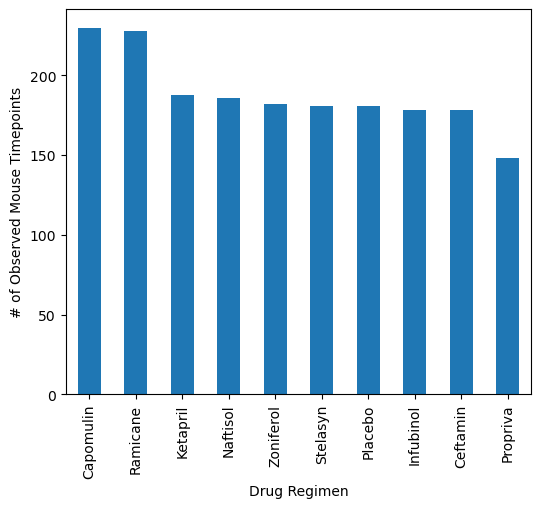

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = regimen_drug['Mouse ID'].count()
custom_order = ['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol', 'Stelasyn', 'Placebo', 'Infubinol', 'Ceftamin', 'Propriva']
regimen_counts = regimen_counts.reindex(custom_order)

# Create a bar plot using Pandas
regimen_counts.plot(kind='bar', figsize=(6, 5))

# Set plot title and labels
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation="vertical")  # Rotate x-axis labels for better visibility
plt.show()


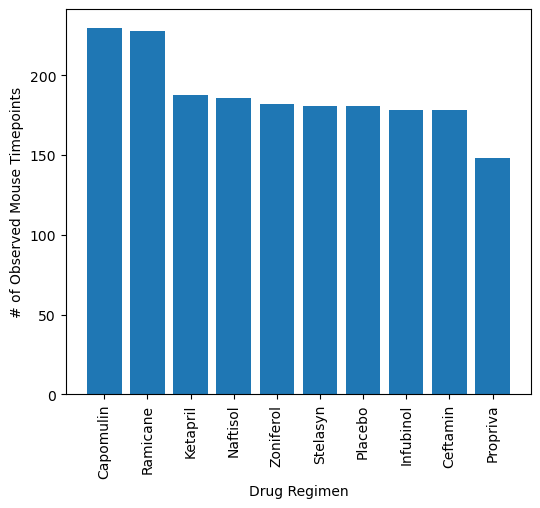

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Define the custom order of drug regimens
custom_order = ['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol', 'Stelasyn', 'Placebo', 'Infubinol', 'Ceftamin', 'Propriva']

# Reorder the regimen_counts to the custom order
regimen_counts = regimen_counts.reindex(custom_order)

# Create a bar plot using Pyplot
plt.figure(figsize=(6, 5))
plt.bar(regimen_counts.index, regimen_counts.values)

# Set plot title and labels

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation="vertical")  # Rotate x-axis labels for better visibility

# Show the plot
plt.show()


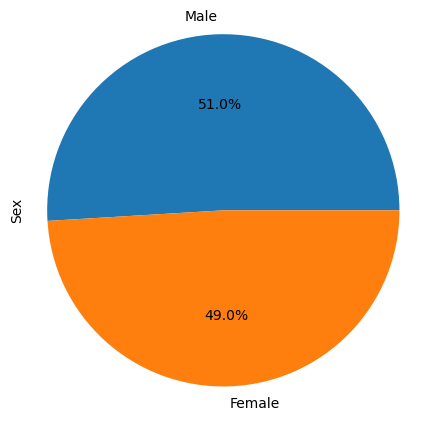

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Group the data by 'Sex' to count the number of male and female mice
gender_distribution = clean_data['Sex'].value_counts()

# Create a pie plot using Pandas
gender_pie= gender_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=0, figsize=(5, 5))

gender_pie.set_ylabel("Sex")

# Show the plot
plt.axis("equal")

plt.show()

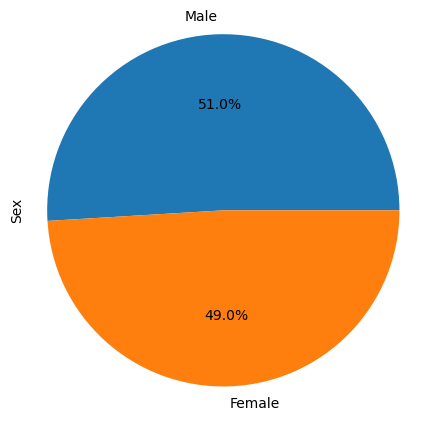

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Group the data by 'Sex' to count the number of male and female mice
gender_distribution = clean_data['Sex'].value_counts()

# Create a pie plot using Pyplot
plt.figure(figsize=(5, 5))

plt.pie(gender_distribution, labels=['Male', 'Female'], autopct='%1.1f%%', startangle=0)

plt.ylabel("Sex")

# Show the plot
plt.axis("equal")
plt.show()

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_timepoints = clean_data[clean_data['Drug Regimen'].isin(treatment_regimens)]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = final_timepoints.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoints, clean_data, on=['Mouse ID', 'Timepoint'], how='left')


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []
potential_outliers = {}

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = final_tumor_volume[final_tumor_volume['Drug Regimen'] == treatment]['Tumor Volume (mm3)']

    # add subset 
    tumor_volume_data.append(treatment_data)
    quartiles = treatment_data.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile   
    
    # Determine outliers using upper and lower bounds
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr    
    potential_outliers[treatment] = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    

# Print the results in the desired format
for treatment, outliers in potential_outliers.items():
    if outliers.empty:
        print(f"{treatment}'s potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)")
    else:
        if treatment == 'Infubinol':
            outliers.index = outliers.index + 16  # Shift the index for Infubinol
        print(f"{treatment}'s potential outliers: {outliers}") 

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


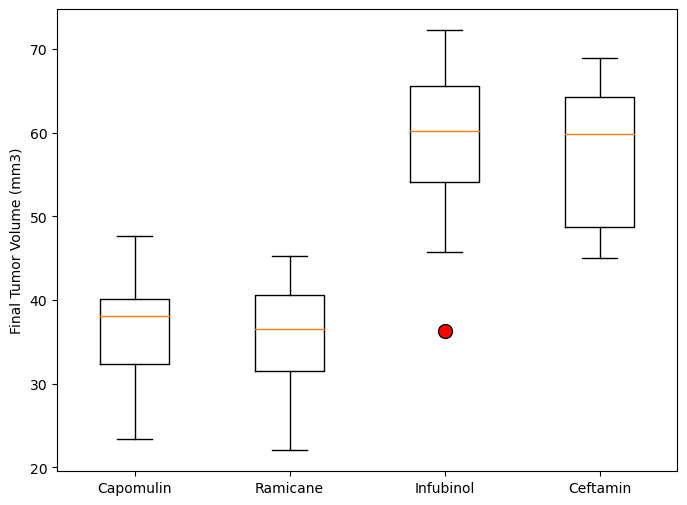

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

plt.figure(figsize=(8, 6))

# Create a boxplot and set the color and marker size of the dots
flierprops = dict(marker='o', markerfacecolor='red', markersize=10)  # Set the marker style and size

plt.boxplot(tumor_volume_data, labels=treatments, flierprops=flierprops)

# Set plot and label

plt.ylabel("Final Tumor Volume (mm3)")

# Show the plot
plt.show()

## Line and Scatter Plots

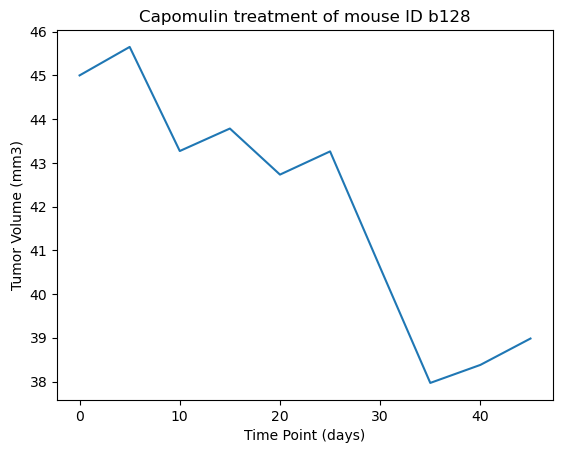

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Filter the data to only include mice treated with Capomulin
df_capomulin = clean_data[clean_data['Drug Regimen'] == 'Capomulin']

# Select a single mouse
mouse_id = 'b128'

# Filter the data to only include the selected mouse
df_mouse = df_capomulin[df_capomulin['Mouse ID'] == mouse_id]

# Create the line plot
fig, ax = plt.subplots()
ax.plot(df_mouse['Timepoint'], df_mouse['Tumor Volume (mm3)'])

# Set the axis labels
ax.set_xlabel('Time Point (days)')
ax.set_ylabel('Tumor Volume (mm3)')

# Set the title
ax.set_title('Capomulin treatment of mouse ID {}'.format(mouse_id))

# Show the plot
plt.show()


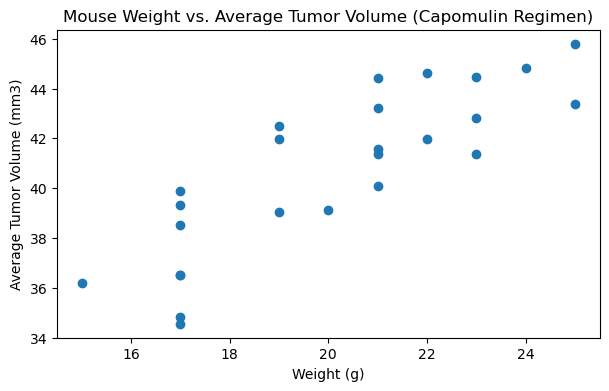

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Filter the data for the Capomulin regimen
capomulin_data = clean_data[clean_data['Drug Regimen'] == 'Capomulin']

# Group the data by 'Mouse ID' and calculate the average tumor volume and weight
average_data = capomulin_data.groupby('Mouse ID').agg({'Tumor Volume (mm3)': 'mean', 'Weight (g)': 'mean'}).reset_index()

# Create a scatter plot of mouse weight vs. average tumor volume
plt.figure(figsize=(7, 4))
plt.scatter(average_data['Weight (g)'], average_data['Tumor Volume (mm3)'], marker='o')

# Set plot labels and title
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show the plot
plt.show()


The correlation between mouse weight and the average tumor volume is 0.84


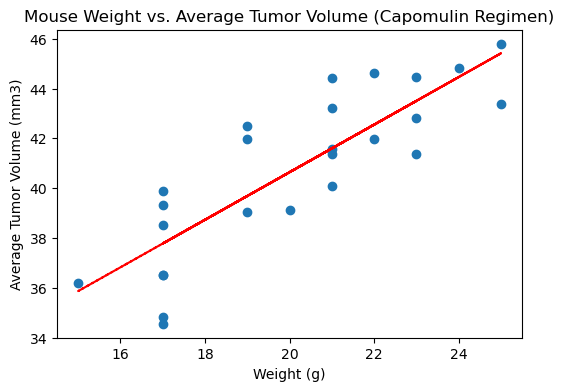

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Filter the data for the Capomulin regimen
capomulin_data = clean_data[clean_data['Drug Regimen'] == 'Capomulin']

# Group the data by 'Mouse ID' and calculate the average tumor volume and weight
average_data = capomulin_data.groupby('Mouse ID').agg({'Tumor Volume (mm3)': 'mean', 'Weight (g)': 'mean'}).reset_index()

# Calculate the correlation coefficient
correlation_coefficient = round(st.pearsonr(average_data['Weight (g)'], average_data['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {correlation_coefficient}")

# Perform linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(average_data['Weight (g)'], average_data['Tumor Volume (mm3)'])

# Create a linear regression line
regression_line = slope * average_data['Weight (g)'] + intercept

# Create a scatter plot of mouse weight vs. average tumor volume
plt.figure(figsize=(6, 4))
plt.scatter(average_data['Weight (g)'], average_data['Tumor Volume (mm3)'], marker='o')

# Plot the linear regression line
plt.plot(average_data['Weight (g)'], regression_line, color='r', linestyle='--')

# Set plot labels and title
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show the plot
plt.show()